<a href="https://colab.research.google.com/github/hsy19y/-/blob/main/12%EC%A3%BC%EC%B0%A8_horses_or_humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [1]:


def solution_model():
  fashion_mnist = tf.keras.datasets.fashion_mnist

  ##1. test_set, train_set 다운
  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

  ##2. 정규화

  train_images = train_images/255.0
  test_images = test_images/255.0

  ## 모델링

  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape= (28,28)),
      tf.keras.layers.Dense(512, activation= 'relu'),
      tf.keras.layers.Dense(256, activation= 'relu'),
      tf.keras.layers.Dense(10, activation= 'softmax'),
  ])

  ## 컴파일
  model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

  ## 학습
  model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs= 5)

  return model

if __name__ == '__main__':
    model = solution_model()
    model.save("TF3-horses-or-humans-type-A.h5")

KeyboardInterrupt: ignored

In [7]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg

import urllib 
import zipfile

url_train = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
url_test = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"

urllib.request.urlretrieve(url_train, 'horse-or-human.zip')
local_zip= 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/horse-or-human')

urllib.request.urlretrieve(url_train, 'validation-horse-or-human.zip')
local_zip= 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation-horse-or-human')

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale = 1/255.,
                                     horizontal_flip = True,
                                     rotation_range = 35,
                                     zoom_range = 0.2)
train_dir = "/content/horse-or-human"
train_gen = image_generator.flow_from_directory(train_dir,
                                                target_size = (300,300),
                                                batch_size = 128,
                                                class_mode = 'binary'
                                                )


Found 1027 images belonging to 2 classes.


<ipython-input-16-5d8b0a249e92>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title(class_labels[labels[i].astype(np.int)])


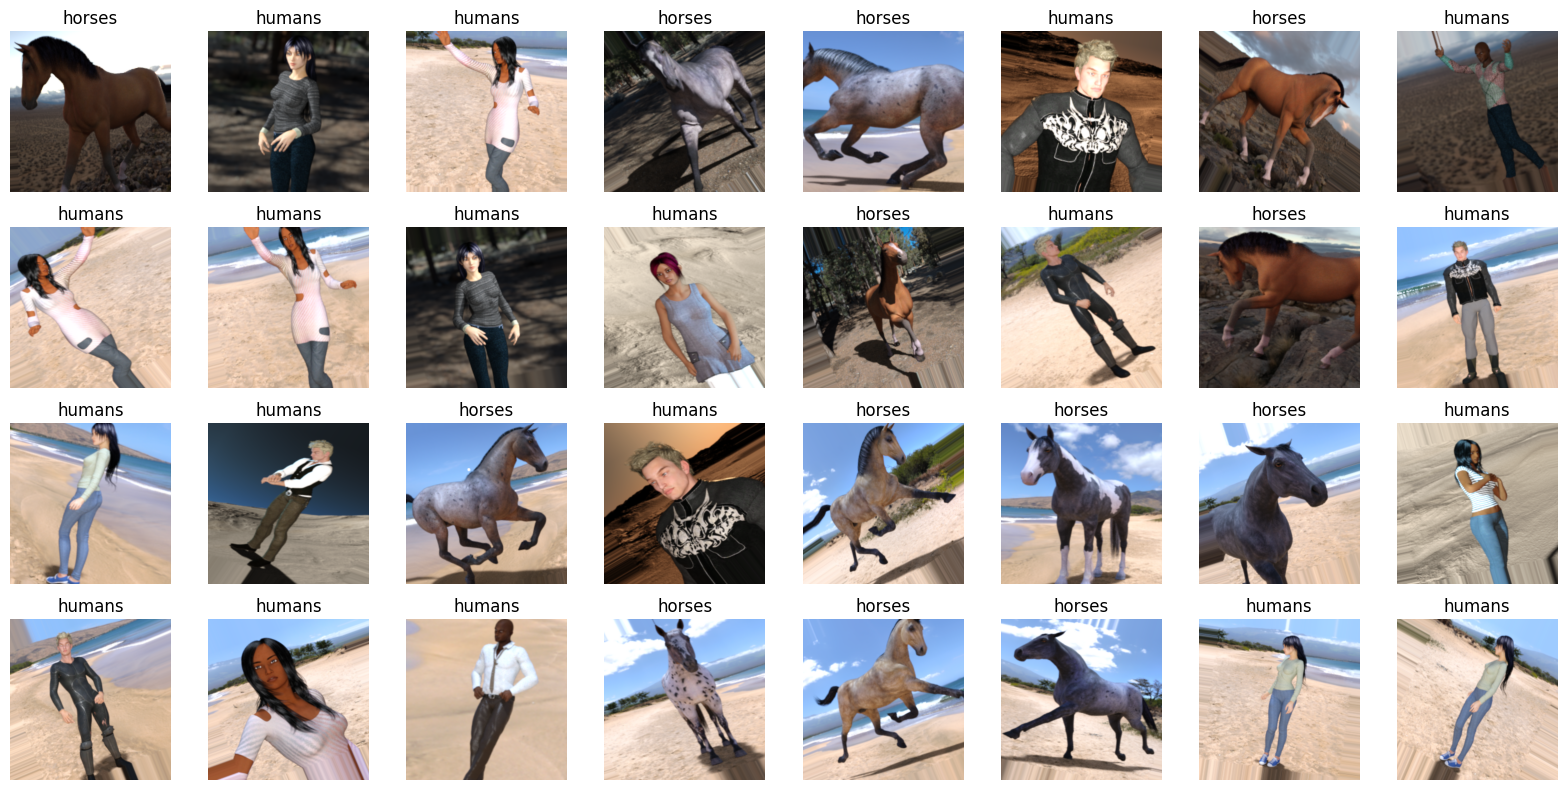

In [16]:
import numpy as np

class_labels= ['horses', 'humans']
batch = next(train_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize = (16,8))
for i in range(32):

  ax = plt.subplot(4,8,i+1)
  plt.imshow(images[i])
  plt.title(class_labels[labels[i].astype(np.int)])
  plt.axis('off')
plt.tight_layout()
plt.show()